In [42]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend(loc=3)
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index


class circpend():
    """
    pulley using the notation from Taylor.
     
    Parameters
    ----------
    omega : float
        
    g : float
        
    R : float
        


    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, om = 0.1, g = 1., R = 0.2, l=1.):
        self.om=om
        self.g=g
        self.R=R
        self.l=l
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        
        """
        return [ y[1], (-self.g*np.sin(y[0]))/self.l+(self.R * self.om**2 * np.cos(y[0]-self.om*t))/self.l ]
    
    
    def solve_ode(self, t_pts, phi_0, phi_dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi, phi_dot = solution.y

        return phi, phi_dot


omt=0.1
gt=1.
Rt=0.2
lt=1.
'''
# Plotting Phi (generate the full time then use slices)
phi_start = -np.pi
phi_end = 4*np.pi
delta_phi = 0.01

phi_pts = np.arange(phi_start, phi_end+delta_phi, delta_phi) 

# Solve Potential
pot1 = potential(phi_pts)
pot2 = potential(phi_pts, m=m2)
'''


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 110.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  



# Instantiate a pulley
c1 = circpend(om = omt, g = gt, R = Rt, l=lt)
# both plots: same initial conditions
phi_0 = 0.2
phi_dot_0 = 0.0
# Solve Exact Solutions
phi1, phi_dot1 = c1.solve_ode(t_pts, phi_0, phi_dot_0)




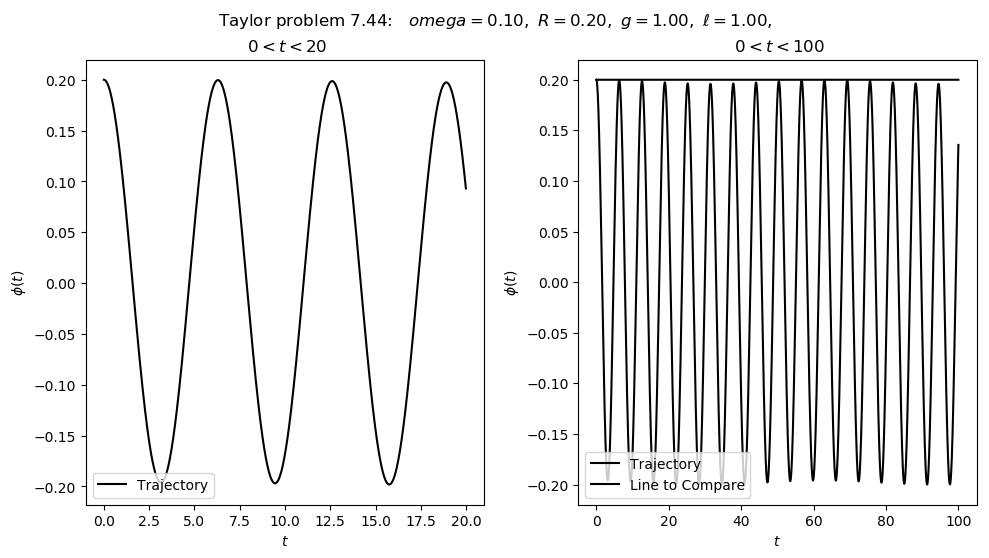

In [50]:
fig = plt.figure(figsize=(10, 10))
overall_title = 'Taylor problem 7.44:  ' + \
                rf' $omega = {omt:.2f},$' + \
                rf' $R = {Rt:.2f},$' + \
                rf' $g = {gt:.2f},$' + \
                rf' $\ell = {lt:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

'''
# plot 1: Potential
ax_a = fig.add_subplot(2,2,1)
start, stop = start_stop_indices(phi_pts, -np.pi, 4*np.pi)    
plot_y_vs_x(phi_pts[start : stop], pot[start : stop], 
            axis_labels=(r'$\phi$', r'$U(\phi)$'), 
            color='black',
            label='Pot. Fcn m=0.7', 
            #title=rf' $test$', 
            ax=ax_a)
start, stop = start_stop_indices(phi_pts, -np.pi, 4*np.pi)    
plot_y_vs_x(phi_pts[start : stop], pot2[start : stop], 
            axis_labels=(r'$\phi$', r'$U(\phi)$'), 
            color='black',
            linestyle='dotted',
            label='Pot. Fcn m=0.8', 
            #title=rf' $test$', 
            ax=ax_a)
plot_y_vs_x(phi_pts[start : stop], np.ones((stop))*potential(0), 
            axis_labels=(r'$\phi$', r'$U(\phi)$'), 
            color='blue',
            linestyle='dashed',
            label='U=0 Initial Condition', 
            #title=rf' $test$', 
            ax=ax_a)
ax_a.axvline(x=np.arcsin(m1/Mt))
'''

# plot 2: phi vs t
ax_a = fig.add_subplot(2,2,1)
start, stop = start_stop_indices(t_pts, 0., 20.)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=(r'$t$', r'$\phi(t)$'), 
            color='black',
            label='Trajectory', 
            title=rf' $0 < t < 20$',
            ax=ax_a)

ax_b = fig.add_subplot(2,2,2)
start, stop = start_stop_indices(t_pts, 0., 100.)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=(r'$t$', r'$\phi(t)$'), 
            color='black',
            label='Trajectory', 
            #title=rf' $0 < t < 20$', 
            ax=ax_b)
plot_y_vs_x(t_pts[start : stop], np.ones((stop))*0.2, 
            axis_labels=(r'$t$', r'$\phi(t)$'), 
            color='black',
            linestyle='solid',
            label='Line to Compare', 
            title=rf' $0 < t < 100$', 
            ax=ax_b)

fig.tight_layout()
fig.savefig('PS6_7.44.png', bbox_inches='tight')  # always bbox_inches='tight'